# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.632436e+01     1.583849e+01
 * time: 0.0017311573028564453
     1     3.494766e+01     8.619417e+00
 * time: 0.0055811405181884766
     2     2.959561e+01     9.122074e+00
 * time: 0.011635065078735352
     3     2.250882e+01     2.397359e+00
 * time: 0.01870417594909668
     4     2.056600e+01     3.083904e+00
 * time: 0.024514198303222656
     5     1.991624e+01     2.438606e+00
 * time: 0.028907060623168945
     6     1.914152e+01     2.072905e+00
 * time: 0.03626298904418945
     7     1.852091e+01     2.032970e+00
 * time: 0.04336118698120117
     8     1.790221e+01     1.514927e+00
 * time: 0.048484086990356445
     9     1.758713e+01     9.302446e-01
 * time: 0.05289816856384277
    10     1.742674e+01     6.385065e-01
 * time: 0.05745220184326172
    11     1.731639e+01     5.444463e-01
 * time: 0.061782121658325195
    12     1.724840e+01     4.880684e-01
 * time: 0.09165000915527344
    13     1.717524e+01     5.546248e-01

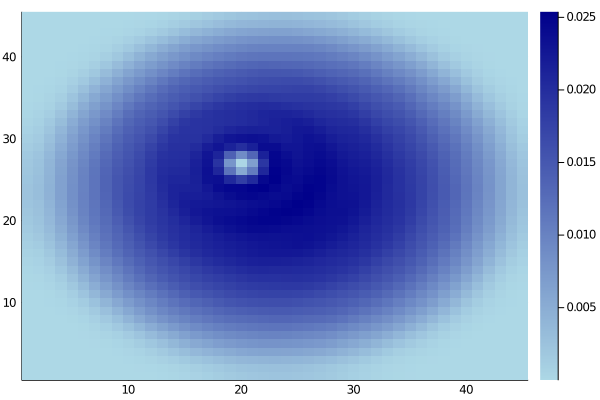

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)